In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from utils import *
from algos import *
from plot import *

**Вариант 11**

In [4]:
def f(x):
  return x**4 + x**2 + x + 1

def fd1(x):
  return 4 * x**3 + 2 * x + 1

def fd2(x):
  return 12 * x**2 + 2

def fd3(x):
  return 24 * x

a, b = -1, 0
EXACT_MIN_POINT = Point(x=-0.38546, y=0.78520)

In [5]:
x0 = -0.5
assert fd1(-0.5) * fd3(-0.5) > 0 # Достаточное условие монотонной сходмимости Ньютона

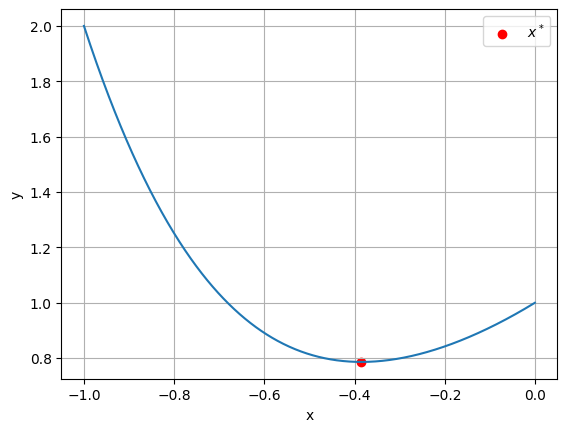

In [6]:
x = np.arange(a, b, 0.001)
y = [f(y) for y in x]

fig, ax = plt.subplots()
ax.scatter(EXACT_MIN_POINT.x, EXACT_MIN_POINT.y, c='r', label='$x^*$')
ax.plot(x, y)
ax.set(xlabel='x', ylabel='y')
ax.legend()
ax.grid()
plt.show()

In [7]:
for eps in (1e-2, 1e-3, 1e-4, 1e-5):
  print(f"ε: {eps}")

  f_wrap = LogPointsWrap(f)
  eps_point = brute_force(f=f_wrap, a=a, b=b, eps=eps)
  print(f'Перебор. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = bitwise_search(f=f_wrap, a=a, b=b, eps=eps, get_init_delta=lambda *args: 0.25)
  print(f'Поразрядный поиск. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = dichotomy(f=f_wrap, a=a, b=b, eps=eps)
  print(f'Дихотомия. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = golden_ratio(f=f_wrap, a=a, b=b, eps=eps)
  print(f'Золотое сечение. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = parabola(f=f_wrap, a=a, b=b, eps=eps, get_init_points=get_init_points_gr)
  print(f'Метод парабол. {eps_point}, N: {len(f_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  eps_point = midpoint(f=fd1_wrap, a=a, b=b, eps=eps)
  print(f'Метод средней точки. {eps_point}, Nd1: {len(f_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  eps_point = chord(f=fd1_wrap, a=a, b=b, eps=eps)
  print(f'Метод хорд. {eps_point}, Nd1: {len(f_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  fd2_wrap = LogPointsWrap(fd2)
  eps_point = newton(fd1=fd1_wrap, fd2=fd2_wrap, x0=x0, eps=eps)
  print(f'Метод Ньютона. {eps_point}, Nd1: {len(fd1_wrap.points)}, Nd2: {len(fd2_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  fd2_wrap = LogPointsWrap(fd2)
  eps_point = newton(fd1=fd1_wrap, fd2=fd2_wrap, x0=x0, eps=eps, use_tau=True)
  print(f'Метод Ньютона-Рафсона. {eps_point}, Nd1: {len(fd1_wrap.points)}, Nd2: {len(fd2_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  fd2_wrap = LogPointsWrap(fd2)
  f_wrap   = LogPointsWrap(f)
  eps_point = newton(fd1=fd1_wrap, fd2=fd2_wrap, x0=x0, eps=eps, f=f_wrap)
  print(f'Метод Марквардта. {eps_point}, N: {len(f_wrap.points)}, Nd1: {len(fd1_wrap.points)}, Nd2: {len(fd2_wrap.points)}')
  print()

ε: 0.01
Перебор. Point(x=-0.39, y=0.7852344099999999), N: 101
Поразрядный поиск. Point(x=-0.38671875, y=0.7851982603315264), N: 13
Дихотомия. Point(x=-0.383046875, y=0.7852062322061241), N: 13
Золотое сечение. Point(x=-0.38854381999831844, y=0.7852133038140368), N: 12
Метод парабол. Point(x=-0.38484083372280703, y=None), N: 5
Метод средней точки. Point(x=-0.3828125, y=None), Nd1: 5
Метод хорд. Point(x=-0.38379118406798174, y=None), Nd1: 5
Метод Ньютона. Point(x=-0.3854585785144336, y=None), Nd1: 3, Nd2: 3
Метод Ньютона-Рафсона. Point(x=-0.38545861330834386, y=None), Nd1: 6, Nd2: 3
Метод Марквардта. Point(x=-0.38555295721894106, y=0.7851952700249685), N: 9, Nd1: 8, Nd2: 8

ε: 0.001
Перебор. Point(x=-0.385, y=0.785195650625), N: 1001
Поразрядный поиск. Point(x=-0.3857421875, y=0.7851954054067392), N: 18
Дихотомия. Point(x=-0.38527685546875, y=0.7851953155454254), N: 21
Золотое сечение. Point(x=-0.3860313206279953, y=0.7851958740757783), N: 16
Метод парабол. Point(x=-0.3850955494956334, y

**Выводы:**
1. Среди методов, использующих значения функции в точке, самый простой (метод перебора) оказался самым неэффективным, количество вычислений значения функции N зависит обратно пропорционально от точности ε. Улучшенный вариант этого метода (метод поразрядного поиска) является намного эффективней, в силу использования унимодальности исследуемой функции.
1. Для методов с исключением отрезков можно рассмотреть формулы для вычисления количества итераций, зависящих от точности. Для метода дихотомии фигурирует log2(x), который растёт быстрее чем ln(x), используемый для метода золотого сечения. Соответственно, для второго метода требуется меньшее кол-во итераций, а значит и меньшее кол-во вычислений значения функции в точке, что и видно из результатов.
1. Метод парабол является наиболее эффективным среди прямых методов, так как в этом методе строится аппроксимирующий многочлен второго порядка с дальнейшим уменьшением отрезка аппроксимации.
1. Сравнивая метод средней точки и метод дихотомии, можно сделать вывод, что первый является почти в два раза эффективней второго метода, так как вычисление двух значений функции вблизи середины очередного отрезка в методе дихотомии можно заменить вычислением одного значения производной исследуемой функции.
1. Рассматривая метод Ньютона можно заметить, что для минимизации исследуемой функции с точностью 0.01, 0.001 и 0.0001 потребовалось одинаковое количество вычислений, что говорит о квадратичной скорости сходимости последовательности.

In [8]:
def newton_f(x):
  return x * math.atan(x) - 1 / 2 * math.log(1 + x**2)

def newton_fd1(x):
  return math.atan(x)

def newton_fd2(x):
  return 1 / (1 + x * x)

NEWTON_EXACT_MIN_POINT = Point(x=0, y=0)

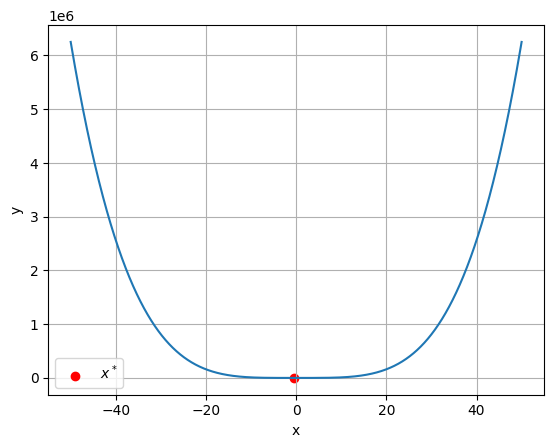

In [9]:
x = np.arange(-50, 50, 0.001)
y = [f(y) for y in x]

fig, ax = plt.subplots()
ax.scatter(EXACT_MIN_POINT.x, EXACT_MIN_POINT.y, c='r', label='$x^*$')
ax.plot(x, y)
ax.set(xlabel='x', ylabel='y')
ax.legend()
ax.grid()
plt.show()

eps = 0.1

In [10]:
a_newt = x[0]
eps_point = None
for x0 in x:
  try:
    eps_point = newton(fd1=newton_fd1, fd2=newton_fd2, x0=x0, eps=eps)
    b_newt = x0
  except ValueError:
    if eps_point is None:
      a_newt = x0
    else:
      break

C:\Users\root\AppData\Local\Temp\ipykernel_10940\1333368622.py:8: RuntimeWarning: overflow encountered in scalar multiply
  return 1 / (1 + x * x)
c:\Users\root\Desktop\code\python\opt_methods\lab1\algos.py:258: RuntimeWarning: divide by zero encountered in scalar divide
  x_new = x - tau * yd1 / (yd2 + mu)
c:\Users\root\Desktop\code\python\opt_methods\lab1\algos.py:258: RuntimeWarning: invalid value encountered in scalar subtract
  x_new = x - tau * yd1 / (yd2 + mu)
c:\Users\root\Desktop\code\python\opt_methods\lab1\algos.py:258: RuntimeWarning: overflow encountered in scalar divide
  x_new = x - tau * yd1 / (yd2 + mu)


In [11]:
a_raph = x[0]
eps_point = None
for x0 in x:
  try:
    eps_point = newton(fd1=newton_fd1, fd2=newton_fd2, x0=x0, eps=eps, use_tau=True)
    b_raph = x0
  except ValueError:
    if eps_point is None:
      a_raph = x0
    else:
      break

C:\Users\root\AppData\Local\Temp\ipykernel_10940\1333368622.py:8: RuntimeWarning: overflow encountered in scalar multiply
  return 1 / (1 + x * x)
c:\Users\root\Desktop\code\python\opt_methods\lab1\algos.py:251: RuntimeWarning: divide by zero encountered in scalar divide
  x_tau = x - yd1 / yd2
c:\Users\root\Desktop\code\python\opt_methods\lab1\algos.py:251: RuntimeWarning: invalid value encountered in scalar subtract
  x_tau = x - yd1 / yd2
c:\Users\root\Desktop\code\python\opt_methods\lab1\algos.py:251: RuntimeWarning: overflow encountered in scalar divide
  x_tau = x - yd1 / yd2


In [12]:
a_marq = x[0]
eps_point = None
for x0 in x:
  try:
    eps_point = newton(fd1=newton_fd1, fd2=newton_fd2, x0=x0, eps=eps, f=newton_f)
    b_marq = x0
  except ValueError:
    if eps_point is None:
      a_marq = x0
    else:
      break

In [13]:
import pandas as pd

# Define the data as a dictionary of lists (or other data structures).
# Keys of the dictionary become column names, and the lists become row data.
data = np.vstack([(a_newt, b_newt), (a_raph, b_raph), (a_marq, b_marq)])
# Define row names (index) as a list.
rows = ["Ньютон", "Рафсон", "Марквардт"]
columns = ['a', 'b']

# Create the DataFrame.
df = pd.DataFrame(data, columns=columns, index=rows)

# Display the DataFrame.
print(df)


                a       b
Ньютон     -1.392   1.391
Рафсон     -3.371   3.370
Марквардт -28.606 -28.409
